# Tarea 3 | Visualización de Datos | Magíster en Ciencias de Datos UC 
---
## Luciano Davico
---

### Importamos los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Winequality_red_Tarea3.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Creamos un dataset alternativo que muestra vinos de buena o mala calidad, siendo 5 el punto de corte

Consideraremos en quality como 1 si es de buena calidad (> 5) y 0 si es de mala calidad (<=5)

In [5]:
df_copy = df.copy()
df_copy['quality'] = df_copy['quality'].apply(lambda x: 1 if x > 5 else 0)
df_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Ahora, podemos observar la curva de densidad, separado por quality, para cada variable, lo que nos puede dar una idea de qué tanto cambia la distribución dependiendo de la calidad del vino, para cada variable. Mientras más cambie la distribución, mejor candidato es la variable.

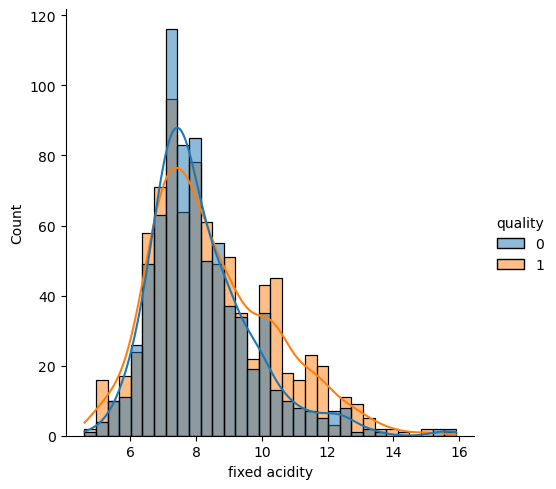

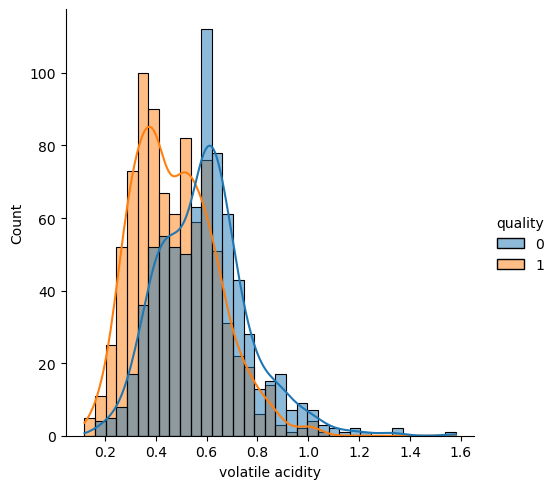

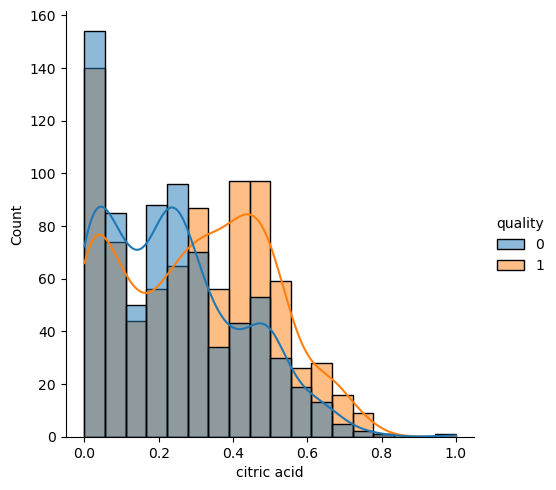

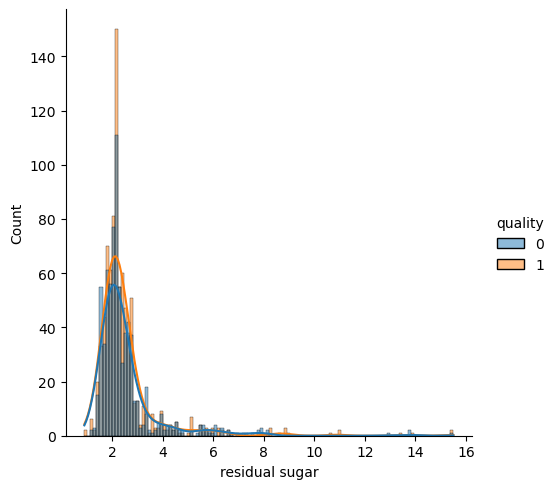

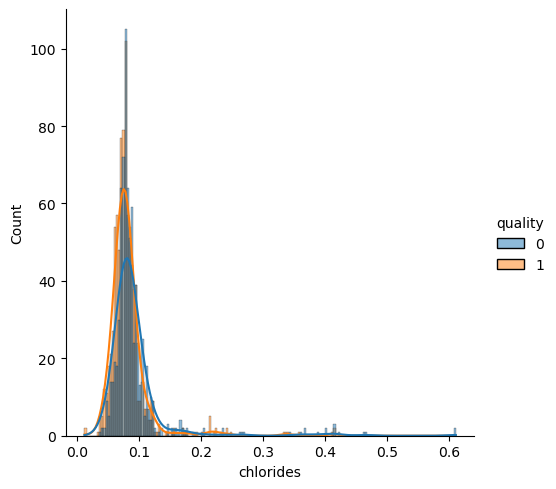

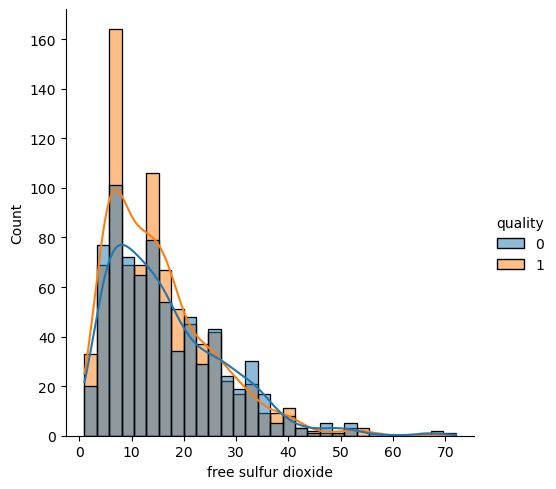

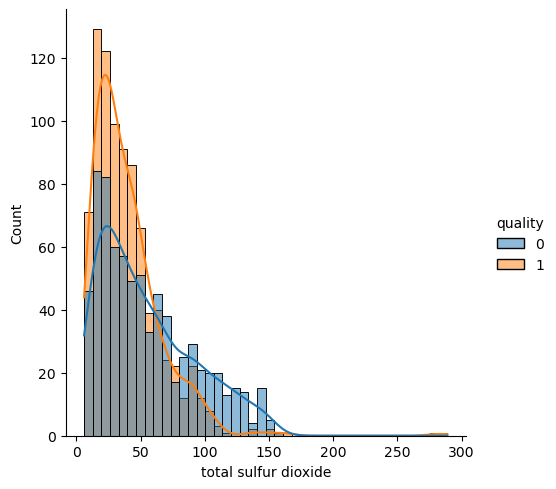

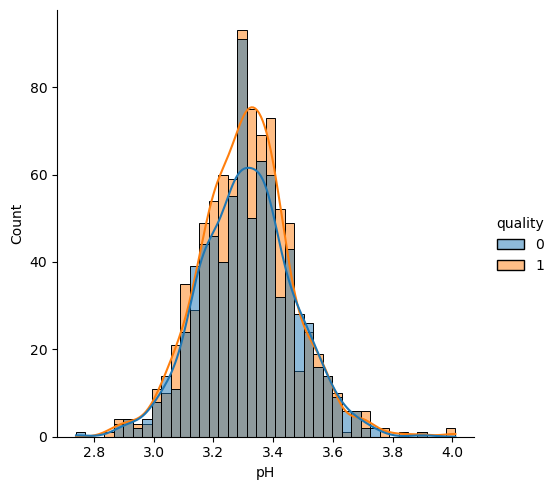

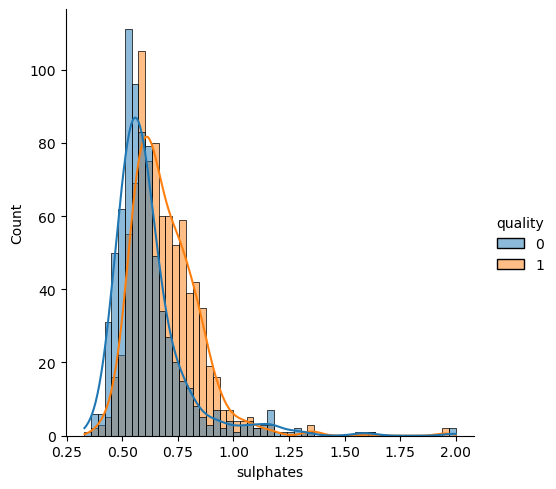

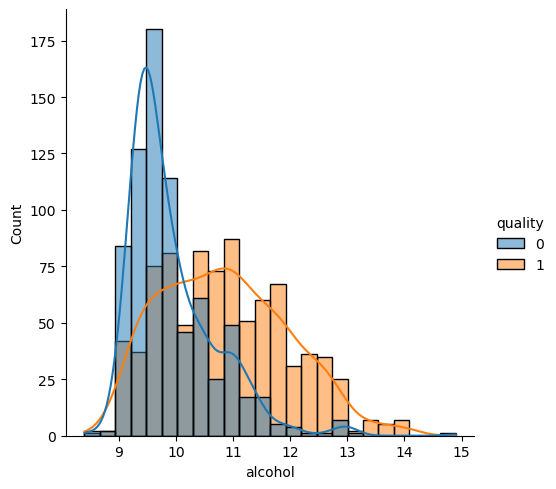

In [6]:
sns.displot(df_copy, x='fixed acidity', hue='quality', kde=True)
sns.displot(df_copy, x='volatile acidity', hue='quality', kde=True)
sns.displot(df_copy, x='citric acid', hue='quality', kde=True)
sns.displot(df_copy, x='residual sugar', hue='quality', kde=True)
sns.displot(df_copy, x='chlorides', hue='quality', kde=True)
sns.displot(df_copy, x='free sulfur dioxide', hue='quality', kde=True)
sns.displot(df_copy, x='total sulfur dioxide', hue='quality', kde=True)
sns.displot(df_copy, x='pH', hue='quality', kde=True)
sns.displot(df_copy, x='sulphates', hue='quality', kde=True)
sns.displot(df_copy, x='alcohol', hue='quality', kde=True)

Observando los gráficos, podemos ver que las distribuciones más diferentes, para cada atributo, entre quality 0 o 1 son
**alcohol**, **volatile acidity**, **citric acid** y **sulphates**. Esto se realiza observando el pico de cada curva y viendo las mayores distancias, lo cual es visualmente simple. Complementamos este análisis observando correlaciones.

### Creamos una matriz de correlaciones entre quality y cada variable

In [7]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Viendo los datos en valor absoluto, las mayores correlaciones son:

**1. alcohol**
**2. volatile acidity**
**3. sulphates**
**4. citric acid**
**5. total sulfure dioxide**

Lo cual nos indica, con mayor fuerza, que las primeras 4 variables deberíamos considerar a nivel de buenos predictores y separadores de ambas clases.

### Generamos los pares de columnas, excluyendo la variable quality, de las 4 variables seleccionadas anteriormente

Generamos scatterplots grupos de columnas para que no sea tan costoso, observando la variable quality

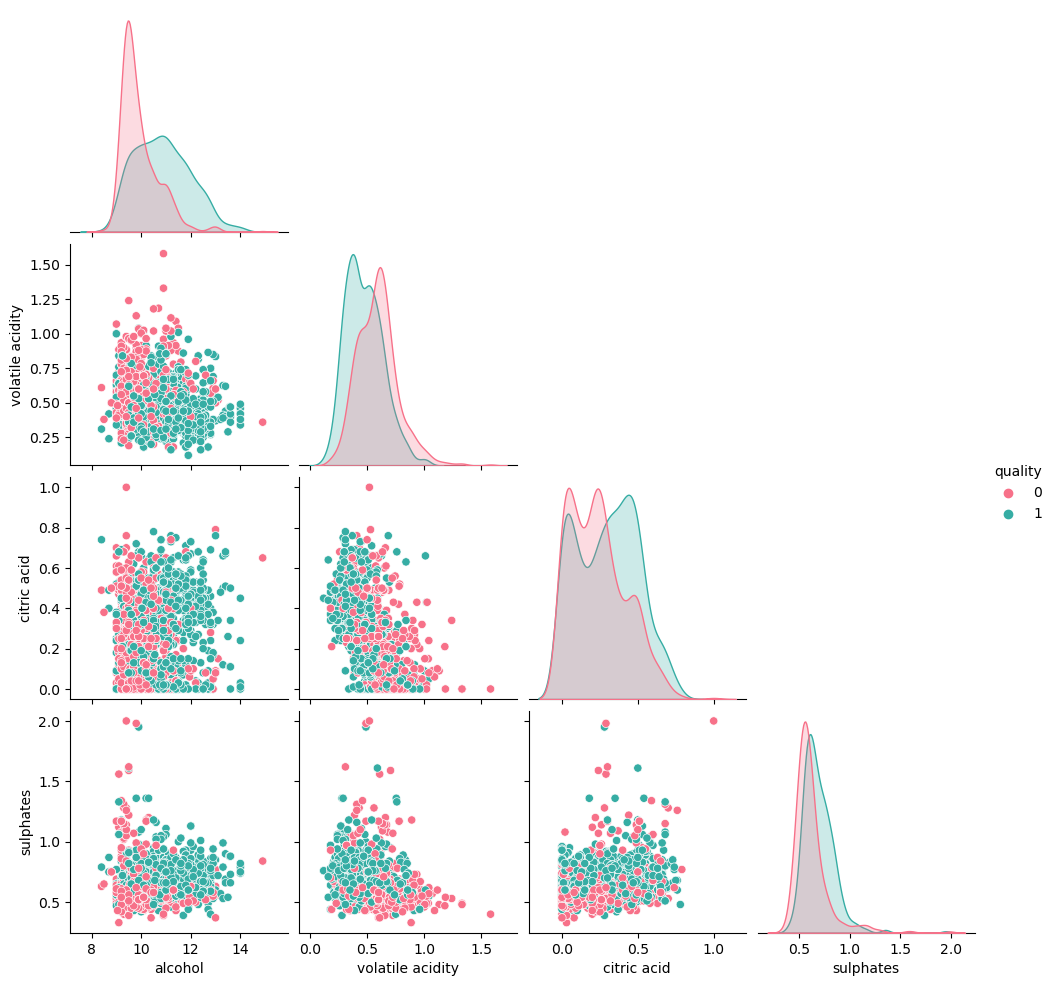

In [8]:
selected_cols = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'quality']
sns.pairplot(df_copy[selected_cols], hue="quality", palette="husl", corner=True)

Visualmente, podemos observar que las mejores combinaciones de variables, para separar entre un vino de buena y mala calidad, son:

**(alcohol, volatile acidity)**

**(alcohol, sulphates)**

**(alcohol, citric acid)**

**(volatile acidity, citric acid)**

**(volatile acidity, sulphates)**

Asimismo, basándonos en nuestro argumento de la correlación y diferencia de distribución en cada variable, podemos ver un ejemplo de dos variables que tienen muy mala correlación con *quality*, las cuales son **free sulfur dioxide** y **residual sugar**, así como también **pH** que tiene baja correlación y distribución muy similar dependiendo del valor de *quality*.

Mostramos los gráficos

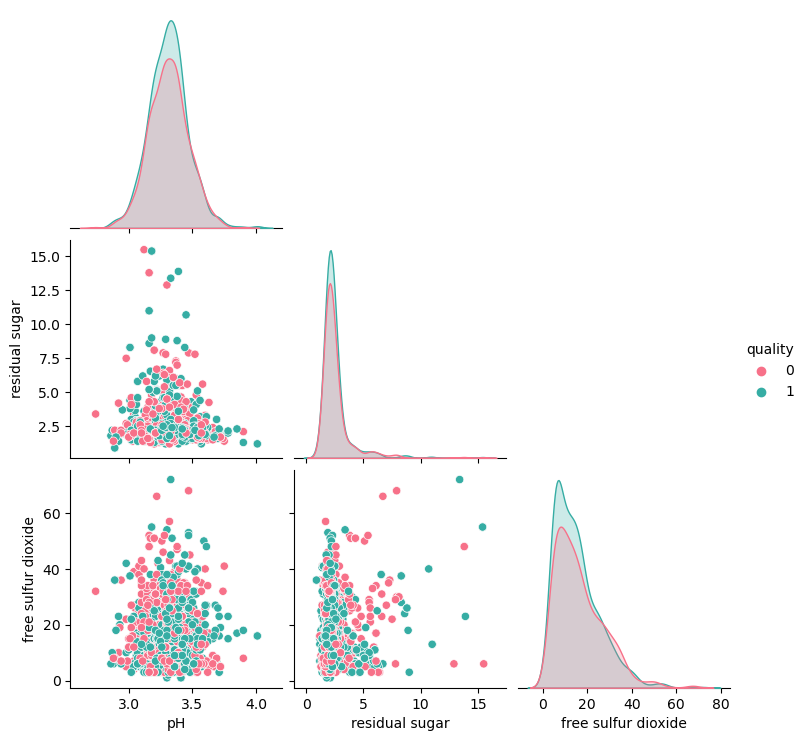

In [9]:
sns.pairplot(df_copy[['pH', 'residual sugar', 'free sulfur dioxide', 'quality']], hue="quality", palette="husl", corner=True)

Podemos ver que, efectivamente, no se ve una separación clara de las clases en ninguno de estos tres gráficos, considerando las 3 combinaciones posibles de variables, y que, coincidentemente, las distribuciones entre distintas calidades son muy similares.

### Uso de métodos de reducción de dimensionalidad

#### Reducción de dimensionalidad lineal con PCA

##### Separación entre diferentes calidades

In [10]:
from sklearn.decomposition import PCA

Separamos en X

In [11]:
X_original = df[df.columns.tolist()[:-1]]
X_original

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
pca = PCA(n_components=2)

# Creamos el dataframe original reducido a 2 componentes
X_original_pca = pca.fit(X_original).transform(X_original)
data_original_pca = pd.DataFrame(X_original_pca)

# Seteamos el dataframe
data_original_pca['quality'] = df['quality']
data_original_pca

,0,1,quality
0,-13.224905,-2.023900,5
1,22.037724,4.408322,5
2,7.162673,-2.501461,5
3,13.430063,-1.951122,6
4,-13.224905,-2.023900,5
...,...,...,...
1594,1.129111,16.313102,5
1595,9.489984,21.627525,6
1596,-3.431354,14.271243,6
1597,1.132878,16.316167,5


Graficamos la separación de cada calidad según cada componente

Text(0, 0.5, 'Componente Principal 2')

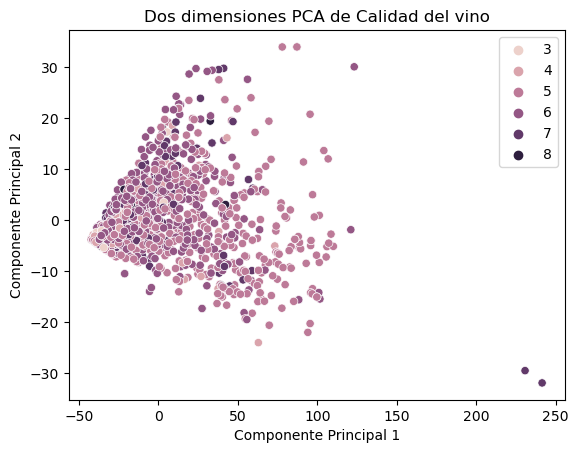

In [13]:
sns.scatterplot(data_original_pca, x=0, y=1, hue='quality')
    
# configurar el gráfico    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Dos dimensiones PCA de Calidad del vino')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

Podemos ver que la reducción de dimensionalidad lineal, para el dataset original, no genera una buena separación entre diferentes dimensiones. Esto se puede deber a que estamos considerando varias columnas que de por sí, no permiten realizar una buena separación, según lo argumentamos anteriormente.

#### Separación entre buena y mala calidad

Repetimos el proceso anterior, pero con calidad buena (1) y calidad mala (0)

In [14]:
X_2q = df_copy[df_copy.columns.tolist()[:-1]]
X_2q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
# Creamos el dataframe original reducido a 2 componentes
X_2q_pca = pca.fit(X_2q).transform(X_2q)
data_2q_pca = pd.DataFrame(X_2q_pca)

# Seteamos el dataframe
data_2q_pca['quality'] = df_copy['quality']
data_2q_pca

,0,1,quality
0,-13.224905,-2.023900,0
1,22.037724,4.408322,0
2,7.162673,-2.501461,0
3,13.430063,-1.951122,1
4,-13.224905,-2.023900,0
...,...,...,...
1594,1.129111,16.313102,0
1595,9.489984,21.627525,1
1596,-3.431354,14.271243,1
1597,1.132878,16.316167,0


Graficamos nuevamente

Text(0, 0.5, 'Componente Principal 2')

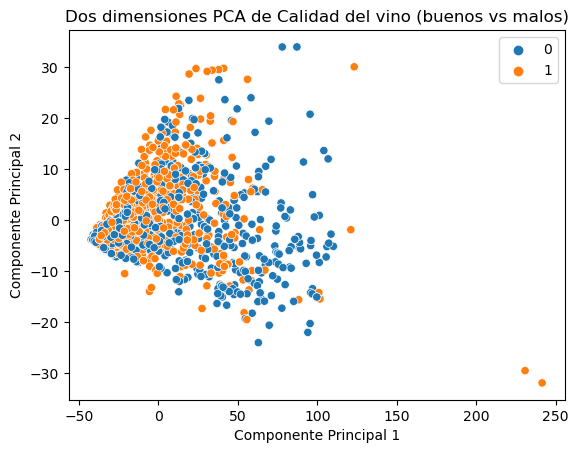

In [16]:
sns.scatterplot(data_2q_pca, x=0, y=1, hue='quality')
    
# configurar el gráfico    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Dos dimensiones PCA de Calidad del vino (buenos vs malos)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

Se puede ver que, si bien dado que ahora solo tenemos dos categorías (0, 1), ambas distribuyen de manera bastante similar, por lo que en realidad quizás el método lineal de componentes principales no sea muy aconsejable en este caso.

Si vemos la distribución de las variables en PCA, veremos que las distribuciones son bien similares para distintos valores de *quality*

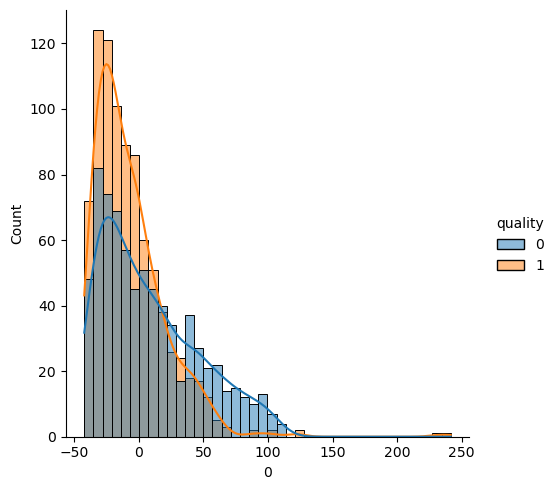

In [19]:
sns.displot(data_2q_pca, x=0, hue='quality', kde=True)

#### Reducción de dimensionalidad no lineal con t-SNE

#### Separación entre diferentes calidades

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, learning_rate="auto", init="random")

X_original_tsne = tsne.fit_transform(X_original)
data_original_tsne= pd.DataFrame(X_original_tsne)
data_original_tsne['quality'] = df['quality']
data_original_tsne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.002s...
[t-SNE] Computed neighbors for 1599 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 2.148113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.379265
[t-SNE] KL divergence after 300 iterations: 1.118795


,0,1,quality
0,-4.015143,-2.186891,5
1,5.426757,-5.164765,5
2,3.192289,-1.484445,5
3,3.713511,0.006115,6
4,-4.015142,-2.186887,5
...,...,...,...
1594,-0.549022,-11.095632,5
1595,3.144277,-10.958945,6
1596,-3.041420,-10.463303,6
1597,-0.553550,-11.098459,5


Graficamos ahora, con las reducciones de dimensionalidad no lineal

Text(0, 0.5, 'Dimensión 2')

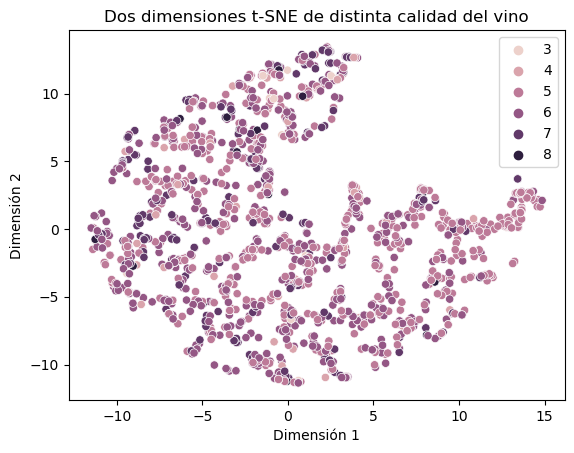

In [22]:
sns.scatterplot(data_original_tsne, x=0, y=1, hue='quality')
    
# configurar el gráfico    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Dos dimensiones t-SNE de distinta calidad del vino')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

Podemos ver que ahora los datos se pueden ver un poco más separados, existiendo una mínima tendencia de tener los vinos de peor mejor calidad a la izquierda del gráfico. Esto lo podremos ver con mas claridad al usar el dataset de calidad binaria.

#### Separación entre buena y mala calidad

Repetimos el proceso para para calidad buena vs mala (1, 0)

In [23]:
X_2q_tsne = tsne.fit_transform(X_2q)
data_2q_tsne= pd.DataFrame(X_2q_tsne)
data_2q_tsne['quality'] = df_copy['quality']
data_2q_tsne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.002s...
[t-SNE] Computed neighbors for 1599 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 2.148113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.312241
[t-SNE] KL divergence after 300 iterations: 1.131689


,0,1,quality
0,0.651757,-3.470886,0
1,7.035286,3.624032,0
2,3.245168,2.538658,0
3,1.328370,3.819731,1
4,0.651758,-3.470886,0
...,...,...,...
1594,10.439124,-3.899496,0
1595,11.601230,-0.679596,1
1596,8.900382,-6.085715,1
1597,10.437333,-3.911164,0


Graficamos para observar posible separación

Text(0, 0.5, 'Dimensión 2')

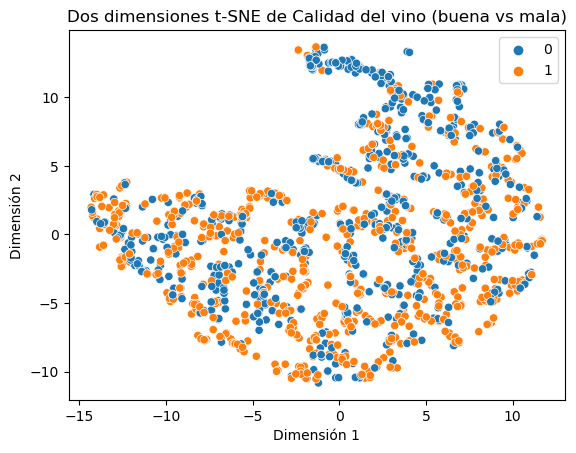

In [24]:
sns.scatterplot(data_2q_tsne, x=0, y=1, hue='quality')
    
# configurar el gráfico    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Dos dimensiones t-SNE de Calidad del vino (buena vs mala)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

Podemos ver que, en primer lugar, el scatterplot es diferente en ambos casos. Lo anterior se debe a que t-SNE es un método estocástico, es decir, aleatorio, a diferencia de PCA que es determinístico. Dado lo anterior, la forma de escoger los vecinos más cercanos será aleatoria a medida que se ejecute el algoritmo. He ahí la primera diferencia importante al ver diferentes gráficos de dispersión. 

Por otra parte, estamos en un caso en que no hay una separación clara de clusters entre diferentes clases. Lo anterior se puede deber a que tenemos muchas variables predictoras que su distribución es similar independiente de la calidad del vino, lo cual dificulta ver a simple vista que una combinación de las variables resulte en posiciones bien separadas por clase. Dado lo anterior, es interesante considerar las variables que tengan distribuciones más diferentes según la clase a predecir y probar métodos de selección de variables que indiquen cuales son las más significativas. 

Si bien t-SNE o PCA no son métodos de feature selection, sino más bien de reducción de dimensionalidad, podemos utilizarlos para validar que ciertas variables del dataset podrían no tener buena capacidad predictiva e introducir ruido, y la forma de validar lo anterior es observando a simple vista si las clases graficadas se pueden observar en clusters bien definidos, dependiendo de la combinación de variables del dataset, utilizado al ejecutar PCA o t-SNE-